
* With the current setup
    * Get the yearly mean for our rough estimate

    * Get the weighted areas, to get energy per grid box




* Can we satisfy the instantaneus demand?
    * Get the instantaneus max demand in a year (Najme)

* Where to put the solar panels?
   * Which are the areas of higher contribution (Selma's cool algorithm)
       * Use top 30 boxes for the local maxima ie, 30 boxes with highest pvpot (mean pvpot or sum pvpot)
   * What makes a place a good place to put solar panels? (Najme)
       *  Radiation, temperature and wind are already accounted in pvpot
       *  ?
       *  Are mountains a good place?
       *  Populated areas?
       *  Beach front
       *  Natural reserves (parks)
       *  Ocean or sea ? can we put them in the mediterranian

* Problem for the future:
    * Max pvpot is at mid day, max consumption is in the evenening
       * What is the maximum difference?
       * How much energy should be stored or commerced(import export)?

### NEXT STEPS (Meeting 08/12/24)
- plot energy per cell for entire year
- Sums for the months
- Sum for entire year

- Where to put the solar panels (see previous comment)

In [2]:
%load_ext autoreload
%autoreload
import tools as tools
import core as core

In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import calendar
import matplotlib.animation

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [66]:
# Open dataset and filter for europe
# range=> [) is open on the right side so +1 to remember
ds = tools.open_dataset(years=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010],months=range(1,12+1))

mask = xr.open_mfdataset("/home/leonardoq88/LEHRE/msc-intro-comp-met-ex-w2024/data/era5/era5_landseamask.nc", engine="h5netcdf", chunks={"valid_time": 1e5})

ds_eu = tools.filter_europe_box(ds)

# Filter for Iran
# ds_eu = ds.sel(latitude=slice(40, 24)).sel(longitude=slice(40, 62))

In [67]:
mask_eu = tools.filter_europe_box(mask)

In [68]:
ds_eu

<xarray.Dataset> Size: 53GB
Dimensions:     (valid_time: 96432, latitude: 141, longitude: 161)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 771kB 2000-01-01 ... 2010-12-31T2...
  * latitude    (latitude) float64 1kB 70.0 69.75 69.5 69.25 ... 35.5 35.25 35.0
  * longitude   (longitude) float64 1kB -10.0 -9.75 -9.5 ... 29.5 29.75 30.0
    expver      (valid_time) <U4 2MB dask.array<chunksize=(744,), meta=np.ndarray>
Data variables:
    t2m         (valid_time, latitude, longitude) float32 9GB dask.array<chunksize=(744, 41, 40), meta=np.ndarray>
    ssrd        (valid_time, latitude, longitude) float32 9GB dask.array<chunksize=(744, 41, 40), meta=np.ndarray>
    ssrdc       (valid_time, latitude, longitude) float32 9GB dask.array<chunksize=(744, 41, 40), meta=np.ndarray>
    u10         (valid_time, latitude, longitude) float32 9GB dask.array<chunksize=(744, 41, 40), meta=np.ndarray>
    v10         (valid_time, latitude, longitude) float32 9GB dask.array<chunksize=(744, 41, 40), meta=np.ndarray>
    wspd        (valid_time, latitude, longitude) float32 9GB dask.array<chunksize=(744, 41, 40), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-21T19:50 GRIB to CDM+CF via cfgrib-0.9.1...

Lets do a rough estimate with the area of europe

In [69]:
# Lets do a rough estimate calculating the overall mean
pvpot_pre = core.pv_pot(ds_eu).groupby(ds_eu.valid_time.dt.month).mean(dim=("valid_time","latitude","longitude"))

In [70]:
# Do the proper computation
pvpot = tools.dask_compute(pvpot_pre, workers=8, threads=3)

/headless/envs/magic/lib/python3.10/site-packages/distributed/node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33513 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:36499' processes=8 threads=24, memory=753.83 GiB>
Execution time: 203.58206 seconds


In [71]:
ds_eu

<xarray.Dataset> Size: 53GB
Dimensions:     (valid_time: 96432, latitude: 141, longitude: 161)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 771kB 2000-01-01 ... 2010-12-31T2...
  * latitude    (latitude) float64 1kB 70.0 69.75 69.5 69.25 ... 35.5 35.25 35.0
  * longitude   (longitude) float64 1kB -10.0 -9.75 -9.5 ... 29.5 29.75 30.0
    expver      (valid_time) <U4 2MB dask.array<chunksize=(744,), meta=np.ndarray>
Data variables:
    t2m         (valid_time, latitude, longitude) float32 9GB dask.array<chunksize=(744, 41, 40), meta=np.ndarray>
    ssrd        (valid_time, latitude, longitude) float32 9GB dask.array<chunksize=(744, 41, 40), meta=np.ndarray>
    ssrdc       (valid_time, latitude, longitude) float32 9GB dask.array<chunksize=(744, 41, 40), meta=np.ndarray>
    u10         (valid_time, latitude, longitude) float32 9GB dask.array<chunksize=(744, 41, 40), meta=np.ndarray>
    v10         (valid_time, latitude, longitude) float32 9GB dask.array<chunksize=(744, 41, 40), meta=np.ndarray>
    wspd        (valid_time, latitude, longitude) float32 9GB dask.array<chunksize=(744, 41, 40), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-21T19:50 GRIB to CDM+CF via cfgrib-0.9.1...

In [72]:
tools.print_pvpot_stats(pvpot)

Calculated pvpot:
    Shape: (12,)
    Months: 12
    Min: 0.035675134509801865
    Mean: 0.1375124305486679
    Max: 0.24543839693069458
    Std: 0.07552687078714371
    


In [73]:
print(f"Each square meter can produce a max of {pvpot.values*237} Watts in January")

Each square meter can produce a max of [10.538857 18.24246  31.157242 45.41632  55.234657 58.1689   54.450817
 45.270504 32.506657 20.040947 11.602939  8.455007] Watts in January


In [75]:
import pint
from pint import UnitRegistry
ureg = UnitRegistry()

# Doing a naive calculation of europe

#AREA:
area_europe = 10.53e6 * (ureg.kilometer * ureg.kilometer)
# '#' compact '~' short 'P' Pretty
print(f"Area Europe: {area_europe.to('km^2'):_~P}")

# Panel rate for panels ---
panel_rated_ouput = 237 * ureg.watt / (ureg.meter * ureg.meter)
print(f"Panel Rated Output: {panel_rated_ouput:#~P}")

europe_max_solar_energy = np.mean(pvpot.values) * panel_rated_ouput * area_europe
print(f"Max solar energy production europe: {europe_max_solar_energy:#~P.2f}")


europe_max_solar_energy_month = europe_max_solar_energy * (720 * ureg.hour)
print(f"Max solar energy production europe month Wh: {europe_max_solar_energy_month:#~P.2f}")
print(f"Max solar energy production europe month J: {europe_max_solar_energy_month.to('joule'):#P.2f}")


Area Europe: 10_530_000.0 km²
Panel Rated Output: 237.0 W/m²
Max solar energy production europe: 343.18 TW
Max solar energy production europe month Wh: 247.09 h·PW
Max solar energy production europe month J: 889.52 exajoule


In [76]:
# https://ec.europa.eu/eurostat/databrowser/view/nrg_cb_e__custom_13932565/default/table?lang=en
# For 2010
europe_electricity_consumption = 2_609_901.560 * 1e9 * ureg.Wh # GigaWattHours European Union
print(f"{europe_electricity_consumption.to('gigawatthour'):_}")
print(f"{europe_electricity_consumption.to('gigawatthour'):#~P}")

2_609_901.56 gigawatt_hour
2.60990156 PWh


In [77]:
# Consumption 
europe_electricity_consumption / europe_max_solar_energy_month

<Quantity(10562.6516, 'watt_hour * meter ** 2 / watt / kilometer ** 2 / hour')>

In [78]:
# 84 PW H europe max January over 28 PW H europe year consumption
84.59/2.82

29.996453900709223

## Better calculation with More precise area

In [79]:
pvpot_pre = core.pv_pot(ds_eu).groupby(ds_eu.valid_time.dt.month).mean(dim=("valid_time"))

In [80]:
pvpot = tools.dask_compute(pvpot_pre, workers=5, threads=2)

/headless/envs/magic/lib/python3.10/site-packages/distributed/node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38543 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:41285' processes=5 threads=10, memory=753.83 GiB>
Execution time: 257.48473 seconds


In [81]:
tools.print_pvpot_stats(pvpot)

Calculated pvpot:
    Shape: (12, 141, 161)
    Months: 12
    Min: -6.018419811994191e-14
    Mean: 0.1375124156475067
    Max: 0.31571266055107117
    Std: 0.08426179736852646
    


In [82]:
pvpot[0]

<xarray.DataArray (latitude: 141, longitude: 161)> Size: 91kB
array([[0.00028288, 0.00028404, 0.00028646, ..., 0.00035707, 0.00036059,
        0.00036288],
       [0.00035842, 0.00035959, 0.00036206, ..., 0.00045589, 0.00046284,
        0.00044963],
       [0.0004473 , 0.00044913, 0.00045172, ..., 0.0005508 , 0.00053594,
        0.00052109],
       ...,
       [0.11731005, 0.11785406, 0.11839996, ..., 0.11996967, 0.11893055,
        0.11836457],
       [0.11876599, 0.11939832, 0.11998831, ..., 0.12170817, 0.12124546,
        0.12107955],
       [0.12008033, 0.12085028, 0.12152749, ..., 0.12348582, 0.12315337,
        0.12304739]], dtype=float32)
Coordinates:
    number     int64 8B 0
  * latitude   (latitude) float64 1kB 70.0 69.75 69.5 69.25 ... 35.5 35.25 35.0
  * longitude  (longitude) float64 1kB -10.0 -9.75 -9.5 ... 29.5 29.75 30.0
    month      int64 8B 1

In [83]:
mask_pvpot = pvpot * mask_eu["lsm"][0]

In [84]:
mask_pvpot.load()

<xarray.DataArray (month: 12, latitude: 141, longitude: 161)> Size: 1MB
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          2.16734057e-04,  2.01310322e-04,  1.96779743e-04],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          3.61544895e-04,  3.01445543e-04,  2.79277941e-04],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          5.17263426e-04,  4.91743849e-04,  4.66835307e-04],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.00303516e-02,  9.36532486e-03,  9.21143498e-03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.38221551e-02,  1.15943067e-02,  1.08614983e-02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.66459288e-02,  1.59199536e-02,  1.52134290e-02],
...
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         -3.45775620e-14, -3.18010016e-14, -3.08950863e-14],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         -4.52285135e-14, -3.71674635e-14, -3.55101453e-14],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         -5.35896875e-14, -5.24584038e-14, -5.13188531e-14],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]],
      dtype=float32)
Coordinates:
    number      int64 8B 0
  * latitude    (latitude) float64 1kB 70.0 69.75 69.5 69.25 ... 35.5 35.25 35.0
  * longitude   (longitude) float64 1kB -10.0 -9.75 -9.5 ... 29.5 29.75 30.0
  * month       (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
    valid_time  datetime64[ns] 8B 2000-01-01
    expver      <U4 16B '0001'

Text(0.5, 0.98, 'MegaWatts Hour per month per m^2')

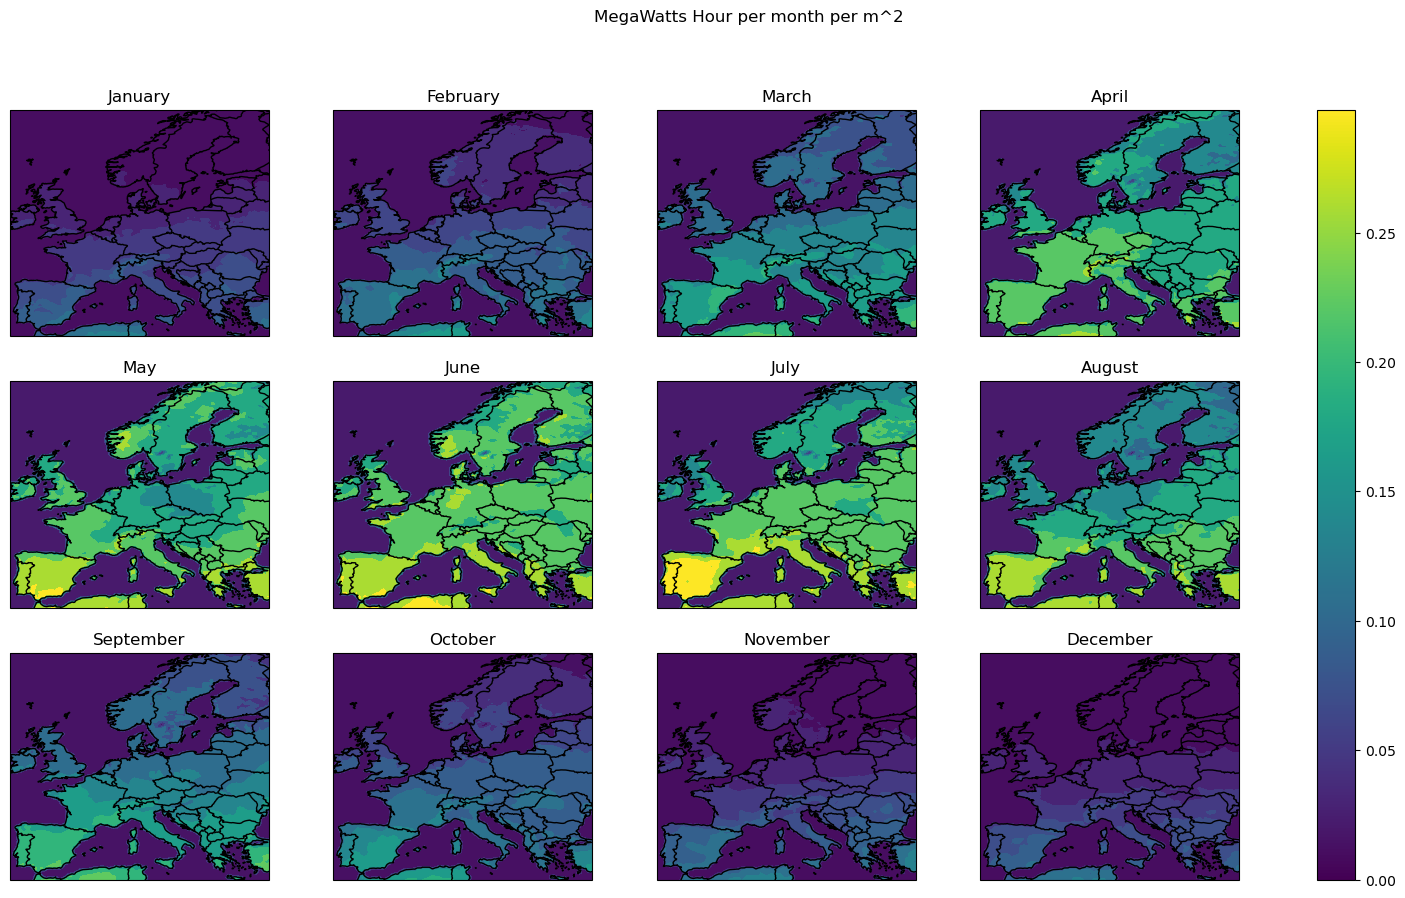

In [22]:
fg, ax = tools.plot_pvpot_per_month(mask_pvpot, 0, mask_pvpot.max())
fg.suptitle("MegaWatts Hour per month per m^2")

In [86]:
import math
def calculate_cell_area(lat1, lat2, lon1, lon2, radius=6371):
    # Convert degrees to radians
    lat1, lat2, lon1, lon2 = map(math.radians, [lat1, lat2, lon1, lon2])
    
    # Calculate the area
    area = radius**2 * abs(math.sin(lat2) - math.sin(lat1)) * abs(lon2 - lon1)
    return area

# Example: Calculate area of a cell
# lat1, lat2 = 3, 3.25  # Latitude bounds
# lon1, lon2 = 5, 5.25  # Longitude bounds
# area = calculate_cell_area(lat1, lat2, lon1, lon2)
# print(f"Area of the cell: {area:.2f} km²")

In [87]:
def grid_cell_area(ds, radius=6371):
    """
    Berechnet die Fläche jeder Gitterzelle basierend auf lat/lon.
    
    Parameters:
        ds (xarray.Dataset): Dataset mit lat/lon-Dimensionen.
        radius (float): Erdradius in Kilometern (Standard: 6371 km).
        
    Returns:
        xarray.DataArray: Flächenwerte für alle Zellen.
    """
    # Sekunden pro Stunde (falls später benötigt)
    sechour = 3600 

    # Extrahiere die Koordinaten für Latitude und Longitude
    lat = ds['latitude'].values
    lon = ds['longitude'].values

    # Berechnung der Bounds (Lat/Lon-Zellenränder)
    lat_bounds = np.concatenate(([lat[0] - (lat[1] - lat[0]) / 2], 
                                  lat[:-1] + np.diff(lat) / 2, 
                                  [lat[-1] + (lat[-1] - lat[-2]) / 2]))
    lon_bounds = np.concatenate(([lon[0] - (lon[1] - lon[0]) / 2], 
                                  lon[:-1] + np.diff(lon) / 2, 
                                  [lon[-1] + (lon[-1] - lon[-2]) / 2]))

    # Flächendifferenzen in Radians
    dlat = np.abs(np.diff(np.sin(np.radians(lat_bounds))))
    dlon = np.abs(np.diff(lon_bounds)) * np.pi / 180

    # Gitter für dlat und dlon erstellen
    dlat_grid, dlon_grid = np.meshgrid(dlat, dlon, indexing="ij")

    # Flächenberechnung für jede Gitterzelle
    cell_areas = radius**2 * dlat_grid * dlon_grid

    # Rückgabe als DataArray
    area_da = xr.DataArray(
        cell_areas,
        coords={"latitude": lat, "longitude": lon},
        dims=["latitude", "longitude"],
        name="cell_area"
    )
    return area_da


In [88]:
ds_eu['cell_area'] = grid_cell_area(ds_eu)
ds_eu['pv_pot'] = mask_pvpot

In [89]:
# Panel rate for panels ---
panel_rated_ouput_per_m2 = 237 # Watts 

ds_eu["energy_potential_per_m2"] = ds_eu["pv_pot"] * panel_rated_ouput_per_m2

ds_eu["energy_potential_per_cell"] = ds_eu["energy_potential_per_m2"] * ds_eu["cell_area"] * 1e6 # Since cell area is in km^2

In [90]:
potential_month = (ds_eu["energy_potential_per_cell"] * 3600 * 24 * 30).sum(axis=(1,2))

In [91]:
potential_month/1e18

<xarray.DataArray 'energy_potential_per_cell' (month: 12)> Size: 96B
array([182.84609122, 301.78161064, 484.98264275, 675.4805422 ,
       790.76997018, 836.44736128, 793.99348116, 676.29296807,
       500.39264621, 323.15944014, 196.53117058, 147.5406928 ])
Coordinates:
    number   int64 8B 0
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [92]:
print(f"Max solar energy production europe month Wh: {europe_max_solar_energy_month:#~P.2f}")
print(f"Max solar energy production europe month J: {europe_max_solar_energy_month.to('joule'):#P.2f}")

Max solar energy production europe month Wh: 247.09 h·PW
Max solar energy production europe month J: 889.52 exajoule


In [93]:
pot = ds_eu["energy_potential_per_cell"][1].sum(axis=(0,1))
pot


<xarray.DataArray 'energy_potential_per_cell' ()> Size: 8B
array(1.16428091e+14)
Coordinates:
    number   int64 8B 0
    month    int64 8B 2

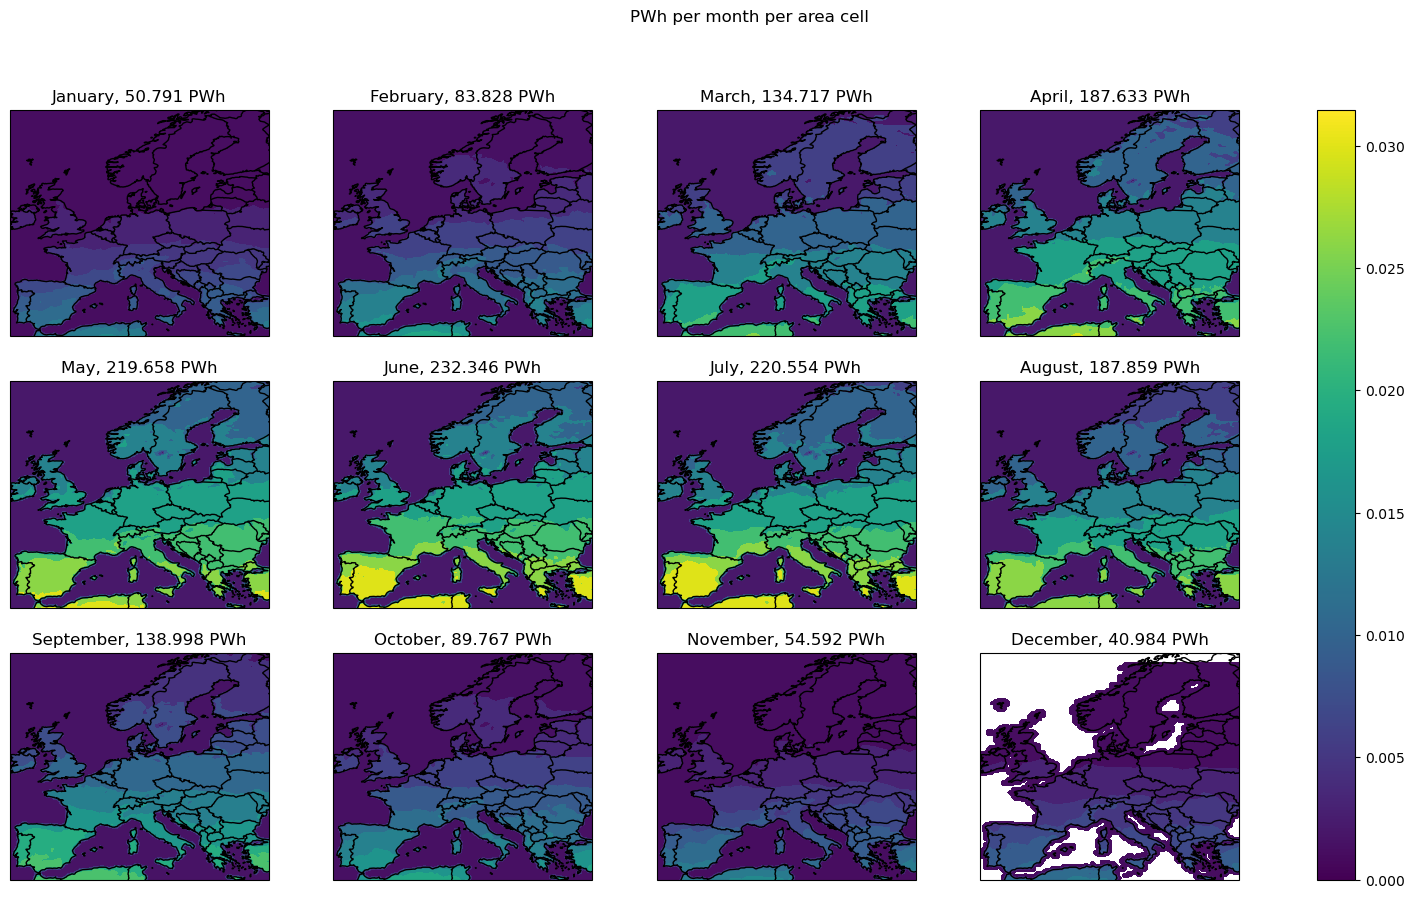

In [94]:
energy_month_per_cell = (ds_eu["energy_potential_per_cell"]*24*30)/1e15
fg, ax = tools.plot_pvpot_per_month(energy_month_per_cell, 0, energy_month_per_cell.max(), datatype = "total_energy")
fg.suptitle("PWh per month per area cell");

In [95]:
year_sum = ((ds_eu["energy_potential_per_cell"]*24*30).sum().values/1e15).round(3)
print(f"Sum for the entire year : , {year_sum:_}, PWh" )

Sum for the entire year : , 1_641.727, PWh


In [96]:
area_ratio = (europe_electricity_consumption.magnitude/1e15)/year_sum
print(f"Electricity consumption in 2022 was: {europe_electricity_consumption.magnitude/1e15} PWh")
print(f"Theoretically, {area_ratio*100:.2f} % of Europe's area could provide enough energy.")

Electricity consumption in 2022 was: 2.60990156 PWh
Theoretically, 0.16 % of Europe's area could provide enough energy.


In [97]:
total_area_square = ds_eu["cell_area"].sum()
print(f"Total area of the square: {total_area_square:_.2f} km\u00b2. {area_ratio*100:.2f} % of that: {total_area_square*area_ratio:_.2f} km\u00b2")

Total area of the square: 10_511_653.74 km². 0.16 % of that: 16_710.68 km²


#### Per month area

In [98]:
# Area per month
monthly_consumption_gwh = np.array([
    261185,
    234776,
    239783,
    205664,
    203909,
    199640,
    208839,
    200014,
    203208,
    221326,
    234241,
    265131
]) # Gigawatt hour
monthly_consumption = monthly_consumption_gwh * 1e9
year_consumption = sum(monthly_consumption)
print(f"{year_consumption}") # Gigas = 10^9
print(f"{year_consumption/1e15:e} TWh") # Petas = 10^15
print(f"Rough area ratio estimate: {(year_consumption)/(monthly_consumption.sum()):.4f}")

2677716000000000.0
2.677716e+00 TWh
Rough area ratio estimate: 1.0000


In [99]:
year_consumption/1e15, monthly_consumption.sum()/1e15

(2.677716, 2.677716)

In [100]:
monthly_consumption/1e15

array([0.261185, 0.234776, 0.239783, 0.205664, 0.203909, 0.19964 ,
       0.208839, 0.200014, 0.203208, 0.221326, 0.234241, 0.265131])

In [101]:
## Permonth area required
monthly_potential_watts = ((ds_eu["energy_potential_per_cell"]*24*30).sum(axis=(1,2)).values).round(3)
for month, month_consumption, month_potential in zip(calendar.month_name[1:], monthly_consumption, monthly_potential_watts):
    area = (month_consumption*100/month_potential).round(4)
    print(f"Month: {month:<10} Consumption: {month_consumption/1e15:.2f} PWh Area: {area}%")
    
# area_ratio = (europe_electricity_consumption.magnitude/1e15)/year_sum
# print(f"Electricity consumption in 2022 was: {europe_electricity_consumption.magnitude/1e15} PWh")
# print(f"Theoretically, {area_ratio*100:.2f} % of Europe's area could provide enough energy.")

Month: January    Consumption: 0.26 PWh Area: 0.5142%
Month: February   Consumption: 0.23 PWh Area: 0.2801%
Month: March      Consumption: 0.24 PWh Area: 0.178%
Month: April      Consumption: 0.21 PWh Area: 0.1096%
Month: May        Consumption: 0.20 PWh Area: 0.0928%
Month: June       Consumption: 0.20 PWh Area: 0.0859%
Month: July       Consumption: 0.21 PWh Area: 0.0947%
Month: August     Consumption: 0.20 PWh Area: 0.1065%
Month: September  Consumption: 0.20 PWh Area: 0.1462%
Month: October    Consumption: 0.22 PWh Area: 0.2466%
Month: November   Consumption: 0.23 PWh Area: 0.4291%
Month: December   Consumption: 0.27 PWh Area: 0.6469%


## Further ideas
- see pvpot changing over the years or decades
- find areas that we could cover with pv panels (to answer the *where*)
- Thinking about the storage problem: maximum differences, power consumption and production curves over different time periods...

### Notes 10.12.2024
- max consumption in a month, max production in a month, so average "monthly buffer" (Naj)
- Sort grid cells top producing to bottom producing and then just sum until you reach what you need (Leo)
- Use ocean mask (Selma)

In [102]:
ds_eu

<xarray.Dataset> Size: 53GB
Dimensions:                    (valid_time: 96432, latitude: 141,
                                longitude: 161, month: 12)
Coordinates:
    number                     int64 8B 0
  * valid_time                 (valid_time) datetime64[ns] 771kB 2000-01-01 ....
  * latitude                   (latitude) float64 1kB 70.0 69.75 ... 35.25 35.0
  * longitude                  (longitude) float64 1kB -10.0 -9.75 ... 30.0
    expver                     (valid_time) <U4 2MB dask.array<chunksize=(744,), meta=np.ndarray>
  * month                      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    t2m                        (valid_time, latitude, longitude) float32 9GB dask.array<chunksize=(744, 41, 40), meta=np.ndarray>
    ssrd                       (valid_time, latitude, longitude) float32 9GB dask.array<chunksize=(744, 41, 40), meta=np.ndarray>
    ssrdc                      (valid_time, latitude, longitude) float32 9GB dask.array<chunksize=(744, 41, 40), meta=np.ndarray>
    u10                        (valid_time, latitude, longitude) float32 9GB dask.array<chunksize=(744, 41, 40), meta=np.ndarray>
    v10                        (valid_time, latitude, longitude) float32 9GB dask.array<chunksize=(744, 41, 40), meta=np.ndarray>
    wspd                       (valid_time, latitude, longitude) float32 9GB dask.array<chunksize=(744, 41, 40), meta=np.ndarray>
    cell_area                  (latitude, longitude) float64 182kB 264.3 ... ...
    pv_pot                     (month, latitude, longitude) float32 1MB 0.0 ....
    energy_potential_per_m2    (month, latitude, longitude) float32 1MB 0.0 ....
    energy_potential_per_cell  (month, latitude, longitude) float64 2MB 0.0 ....
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-21T19:50 GRIB to CDM+CF via cfgrib-0.9.1...

In [40]:
def get_cells_to_cover_consumption(potential_production, desired_production, percentage_to_cover=1):
    production_cells = []
    energy_coverage = 0
    energy_flat = potential_production.values.flatten()
    mi = np.argsort(energy_flat)[::-1]

    last_printed_percent = 0.0
    for idx in mi:
        lat_idx, lon_idx = np.unravel_index(idx, potential_production.shape)
        energy = energy_flat[idx]
        energy_coverage += energy
        lat = ds_eu.latitude.values[lat_idx]
        long = ds_eu.longitude.values[lon_idx]
        production_cells.append({
            "energy": energy,
            "latitude": lat,
            "longitude": long,
            "area": ds_eu.sel(latitude=lat, longitude=long).cell_area.values.item(),
        })
        if energy_coverage > desired_production*percentage_to_cover:
            break
        else:
            new_coverage_percent = energy_coverage/desired_production
            if (new_coverage_percent - last_printed_percent) > 0.25:
                print(f"Current coverage {energy_coverage:.2e} or {energy_coverage*100/desired_production:.0f}% ")
                last_printed_percent = new_coverage_percent
    print(f"Last coverage {energy_coverage:.2e} or {energy_coverage*100/desired_production:.0f}% ")
    return production_cells


In [103]:
monthly_panel_usage = []
for month, month_consumption, month_potential in zip(calendar.month_name[1:], monthly_consumption, (ds_eu["energy_potential_per_cell"]*24*30)):
    # Dont select cells in Algeria
    month_potential.loc[(month_potential.latitude < 37), (month_potential.longitude <= 15) & (month_potential.longitude >= 0) ] = 0
    month_potential.loc[(month_potential.latitude < 36), (month_potential.longitude < 0) & (month_potential.longitude > -10) ] = 0
    cells = get_cells_to_cover_consumption(month_potential, month_consumption, percentage_to_cover=1.5)
    print(f"Total selected cells {len(cells)}")
    monthly_panel_usage.append(cells)

Current coverage 6.53e+13 or 25% 
Current coverage 1.41e+14 or 54% 
Current coverage 2.15e+14 or 82% 
Current coverage 2.88e+14 or 110% 
Current coverage 3.60e+14 or 138% 
Last coverage 3.96e+14 or 151% 
Total selected cells 32
Current coverage 6.97e+13 or 30% 
Current coverage 1.36e+14 or 58% 
Current coverage 2.00e+14 or 85% 
Current coverage 2.65e+14 or 113% 
Current coverage 3.28e+14 or 140% 
Last coverage 3.60e+14 or 153% 
Total selected cells 22
Current coverage 6.95e+13 or 29% 
Current coverage 1.37e+14 or 57% 
Current coverage 2.03e+14 or 85% 
Current coverage 2.68e+14 or 112% 
Current coverage 3.32e+14 or 139% 
Last coverage 3.75e+14 or 156% 
Total selected cells 17
Current coverage 5.26e+13 or 26% 
Current coverage 1.05e+14 or 51% 
Current coverage 1.58e+14 or 77% 
Current coverage 2.10e+14 or 102% 
Current coverage 2.62e+14 or 127% 
Last coverage 3.14e+14 or 153% 
Total selected cells 12
Current coverage 5.85e+13 or 29% 
Current coverage 1.17e+14 or 57% 
Current coverage 1.7

In [42]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Example: max_coordinates contains the max 10 coordinates and their pvpot values
# max_coordinates = [{'pvpot': value, 'latitude': lat, 'longitude': lon, 'month': month}, ...]

def plot_panel_locations(cells, month=""):
    # Set up the map
    fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Add a base map (using Cartopy's Natural Earth features)
    # Limit we are using: lat 70-35, long: -10,30
    # ax.set_extent([-30, 40, 30, 75], crs=ccrs.PlateCarree())  # Limits for Europe
    ax.coastlines(resolution='50m')
    ax.add_feature(cfeature.BORDERS, linestyle=':', alpha=0.7)
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
    
    # Extract coordinates and values from max_coordinates
    latitudes = [coord['latitude'] for coord in cells]
    longitudes = [coord['longitude'] for coord in cells]
    
    # Plot the coordinates as red points
    ax.scatter(longitudes, latitudes, color='red', marker='s', label='Solar Panels', transform=ccrs.PlateCarree())
    
    ax.gridlines(draw_labels=True, color='gray', linestyle='--', linewidth=0.5)
    # Optionally: Label the points with their pvpot values
    # for coord in max_coordinates:
    #     ax.text(coord['longitude'] + 0.5, coord['latitude'], f"{coord['energy']:.2f}", color='red', fontsize=10,
    #             transform=ccrs.PlateCarree())
    
    # Show the plot
    plt.title(f'Panel suggested Locations Europe: {month}')
    plt.legend(loc='upper left')
    # plt.show()

def prepare_panel_locations_plot():
    # Set up the map
    fig, ax = plt.subplots(figsize=(17, 15), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Add a base map (using Cartopy's Natural Earth features)
    # ax.set_extent([-30, 40, 30, 75], crs=ccrs.PlateCarree())  # Limits for Europe
    # ax.set_extent([-15, 35, 30, 75], crs=ccrs.PlateCarree())  # Limits for Europe
    ax.set_extent([-11, 31, 34, 71], crs=ccrs.PlateCarree())  # Limits for Europe
    ax.coastlines(resolution='50m')
    ax.add_feature(cfeature.BORDERS, linestyle=':', alpha=0.7)
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
    
    # Extract coordinates and values from max_coordinates
    latitudes = [coord['latitude'] for coord in cells]
    longitudes = [coord['longitude'] for coord in cells]
    
    # Plot the coordinates as red points
    c = ax.contourf(energy_month_per_cell[0].longitude, energy_month_per_cell[0].latitude, energy_month_per_cell[0], vmin=0, vmax=energy_month_per_cell.max())
    l = ax.scatter(longitudes, latitudes, color='red', marker='s', s=13, label='Solar Panels', transform=ccrs.PlateCarree(), zorder=50, edgecolors='black')
    ax.gridlines(draw_labels=True, color='gray', linestyle='--', linewidth=0.5)
    # Optionally: Label the points with their pvpot values
    # for coord in max_coordinates:
    #     ax.text(coord['longitude'] + 0.5, coord['latitude'], f"{coord['energy']:.2f}", color='red', fontsize=10,
    #             transform=ccrs.PlateCarree())
    
    # Show the plot
    plt.title(f'Panel suggested Locations Europe: {month}')
    plt.legend(loc='upper left')

    
    clb = fig.colorbar(ScalarMappable(norm=Normalize(0, energy_month_per_cell.max()*1e3)), ax=ax, orientation='vertical', shrink=0.5)
    clb.set_label("Energy in GWh")
    return fig, ax, l, c

def animate(i):
    latitudes = np.array([coord['latitude'] for coord in monthly_panel_usage[i]])
    longitudes = np.array([coord['longitude']-0.1 for coord in monthly_panel_usage[i]])
    energy = sum([cell["energy"] for cell in monthly_panel_usage[i]])/1e15
    area = sum([cell["area"] for cell in monthly_panel_usage[i]])
    
    # print(latitudes.shape, longitudes.shape)
    # print(f"{energy:.1f}PWh of {monthly_consumption[i]/1e15:.1f}PWh")
    ax.set_title(f'{calendar.month_name[i+1]} | {area:_.0f}km² of panel suggested Locations: Generating:{energy:.3f}PWh of {monthly_consumption[i]/1e15:.3f}PWh Required')
    ax.contourf(energy_month_per_cell[i].longitude, energy_month_per_cell[i].latitude, energy_month_per_cell[i], vmin=0, vmax=energy_month_per_cell.max())
    l.set_offsets(np.column_stack((longitudes, latitudes)))  # Update the positions of the scatter points


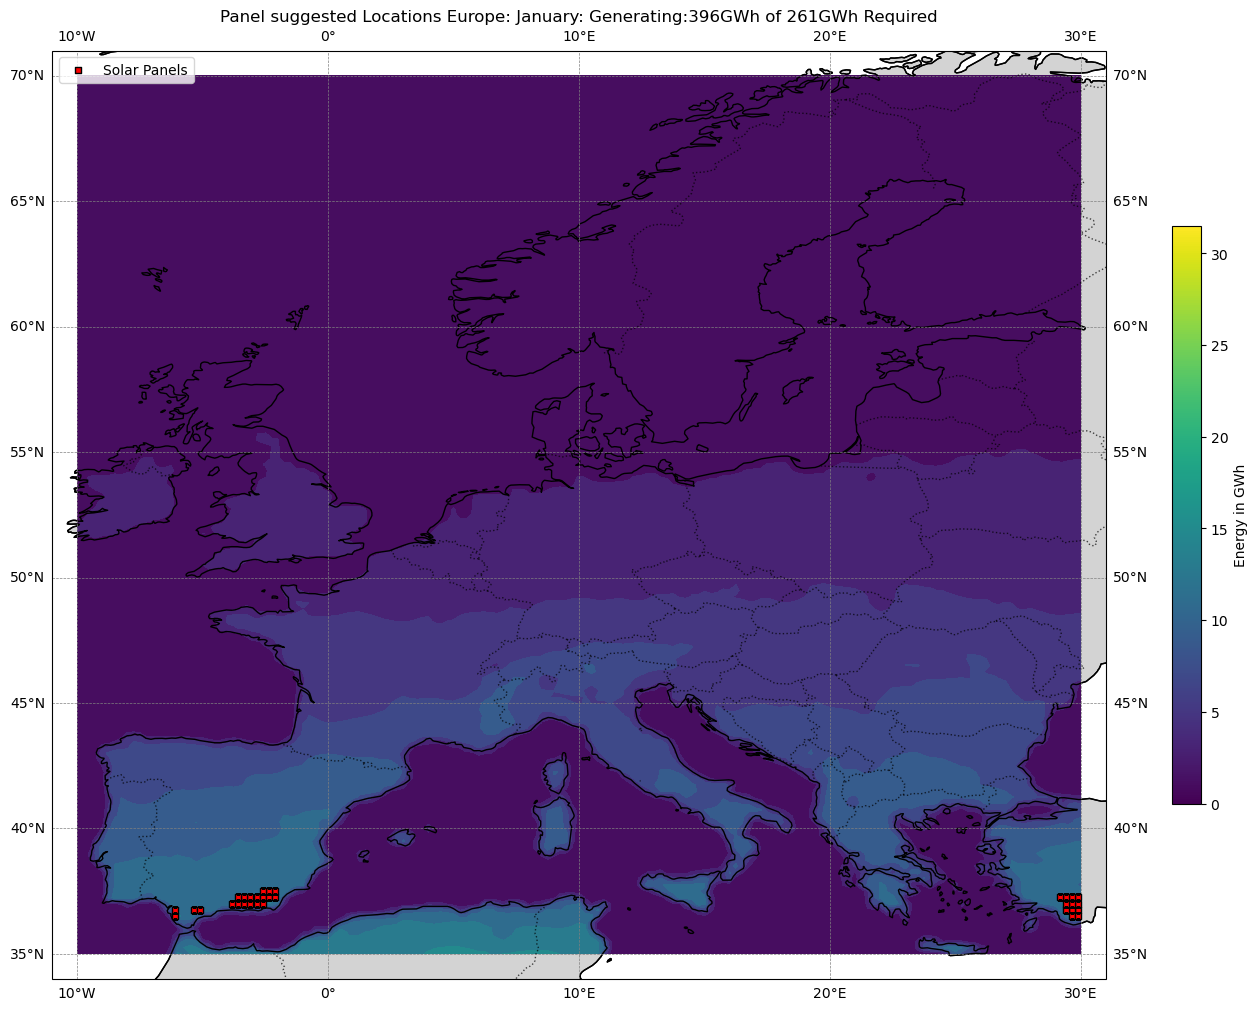

In [104]:
fig, ax,  l, c = prepare_panel_locations_plot()
# Create animation
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(monthly_panel_usage), interval=1500)

ani.save('sin_animation.gif', writer='pillow', fps=0.5)

# Display animation in Jupyter notebook
from IPython.display import HTML
HTML(ani.to_html5_video())


In [44]:
area_covered = 0
for c in cells:
    area_covered += ds_eu.cell_area.sel(latitude=c["latitude"], longitude=c["longitude"])
area_covered

<xarray.DataArray 'cell_area' ()> Size: 8B
array(23359.80021086)
Coordinates:
    number     int64 8B 0
    latitude   float64 8B 36.75
    longitude  float64 8B 30.0

In [45]:
area_covered/total_area_square

<xarray.DataArray 'cell_area' ()> Size: 8B
array(0.00222228)
Coordinates:
    number     int64 8B 0
    latitude   float64 8B 36.75
    longitude  float64 8B 30.0

In [46]:
area_covered/total_area_square

<xarray.DataArray 'cell_area' ()> Size: 8B
array(0.00222228)
Coordinates:
    number     int64 8B 0
    latitude   float64 8B 36.75
    longitude  float64 8B 30.0

In [47]:
energy_year = ds_eu.energy_potential_per_cell.sum(dim="month") * 24 * 30
energy_year_masked = energy_year.where(mask_eu["lsm"][0] >0)

In [48]:
energy_flat = energy_year_masked.values.flatten()
mi = np.argsort(energy_flat)[::-1]

In [49]:
energy_flat = energy_flat[~np.isnan(energy_flat)]

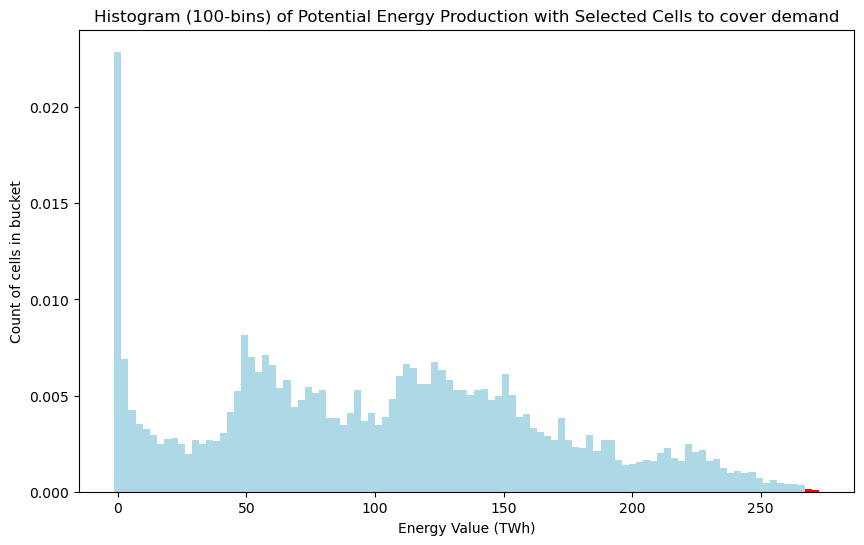

Total selected cells: 10
Total energy produced: 2711.56 PWh


In [65]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

def plot_histogram_energy_supply(energy_flat, required_energy):
    # Example: Assuming 'data' is your xarray dataset and 'your_variable' is the energy variable
    # And 'required_energy' is the energy you want to achieve
    
    # 1. Flatten the energy variable into a 1D array
    values = energy_flat

    
    # 2. Sort values from highest to lowest (for selecting the highest producers)
    sorted_values = np.sort(values)[::-1]
    
    # 3. Calculate the cumulative energy and determine how many cells you need to reach the required_energy
    cumulative_energy = np.cumsum(sorted_values)
    
    # Find the index where cumulative energy exceeds or matches the required energy
    selected_cells_count = np.argmax(cumulative_energy >= required_energy) + 1  # +1 to include the cell that meets or exceeds the target
    
    # 4. Create histogram and calculate bin edges and bin counts
    hist_values, bin_edges = np.histogram(values, bins=100, density=True)
    
    # 5. Assign two colors: one for selected cells, another for non-selected cells
    # We will use a mask to mark the selected cells
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculate bin centers
    selected_bins = bin_centers >= sorted_values[selected_cells_count-1]  # Select bins based on the cumulative energy
    
    # 6. Create a color mapping for the bins: selected or not
    colors = ['red' if selected else 'lightblue' for selected in selected_bins]
    
    # 7. Plot the histogram with two colors
    plt.figure(figsize=(10, 6))
    for i in range(len(hist_values)):
        plt.bar(bin_edges[i], hist_values[i], width=np.diff(bin_edges)[i], color=colors[i])
    
    # Add titles and labels
    plt.title('Histogram (100-bins) of Potential Energy Production with Selected Cells to cover demand')
    plt.xlabel('Energy Value (TWh)')
    plt.ylabel('Count of cells in bucket')
    # plt.yscale('log')
    plt.show()
    
    # Output the number of cells selected and the total energy produced
    print(f"Total selected cells: {selected_cells_count}")
    print(f"Total energy produced: {cumulative_energy[selected_cells_count-1]:.2f} PWh")

plot_histogram_energy_supply(energy_flat/1e12, europe_electricity_consumption.magnitude/1e12)

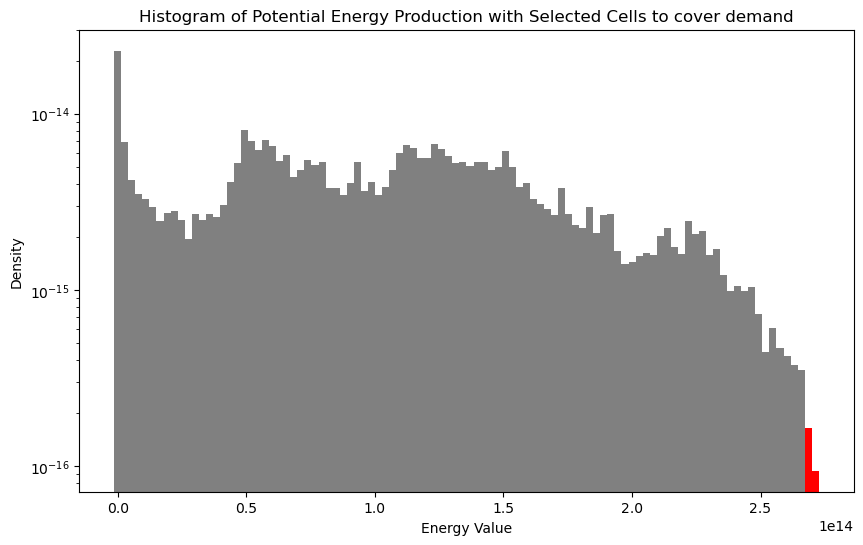

Total selected cells: 10
Total energy produced: 2.71 PWh


In [51]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

def plot_histogram_energy_supply(energy_flat, required_energy):
    # Example: Assuming 'data' is your xarray dataset and 'your_variable' is the energy variable
    # And 'required_energy' is the energy you want to achieve
    
    # 1. Flatten the energy variable into a 1D array
    values = energy_flat

    
    # 2. Sort values from highest to lowest (for selecting the highest producers)
    sorted_values = np.sort(values)[::-1]
    
    # 3. Calculate the cumulative energy and determine how many cells you need to reach the required_energy
    cumulative_energy = np.cumsum(sorted_values)
    
    # Find the index where cumulative energy exceeds or matches the required energy
    selected_cells_count = np.argmax(cumulative_energy >= required_energy) + 1  # +1 to include the cell that meets or exceeds the target
    
    # 4. Create histogram and calculate bin edges and bin counts
    hist_values, bin_edges = np.histogram(values, bins=100, density=True)
    
    # 5. Assign two colors: one for selected cells, another for non-selected cells
    # We will use a mask to mark the selected cells
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculate bin centers
    selected_bins = bin_centers >= sorted_values[selected_cells_count-1]  # Select bins based on the cumulative energy
    
    # 6. Create a color mapping for the bins: selected or not
    colors = ['red' if selected else 'gray' for selected in selected_bins]
    
    # 7. Plot the histogram with two colors
    plt.figure(figsize=(10, 6))
    for i in range(len(hist_values)):
        plt.bar(bin_edges[i], hist_values[i], width=np.diff(bin_edges)[i], color=colors[i])
    
    # Add titles and labels
    plt.title('Histogram of Potential Energy Production with Selected Cells to cover demand')
    plt.xlabel('Energy Value')
    plt.ylabel('Density')
    plt.yscale('log')
    plt.show()
    
    # Output the number of cells selected and the total energy produced
    print(f"Total selected cells: {selected_cells_count}")
    print(f"Total energy produced: {cumulative_energy[selected_cells_count-1]/1e15:.2f} PWh")
    return 

plot_histogram_energy_supply(energy_flat, europe_electricity_consumption.magnitude)

In [52]:
def animate(i):
    latitudes = np.array([coord['latitude'] for coord in monthly_panel_usage[i]])
    longitudes = np.array([coord['longitude']-0.1 for coord in monthly_panel_usage[i]])
    energy = sum([cell["energy"] for cell in monthly_panel_usage[i]])/1e12
    # print(latitudes.shape, longitudes.shape)
    # print(f"{energy:.1f}PWh of {monthly_consumption[i]/1e15:.1f}PWh")
    ax.set_title(f'Panel suggested Locations Europe: {calendar.month_name[i+1]}: Generating:{energy:.0f}GWh of {monthly_consumption[i]/1e12:.0f}GWh Required')
    ax.contourf(energy_month_per_cell[i].longitude, energy_month_per_cell[i].latitude, energy_month_per_cell[i], vmin=0, vmax=energy_month_per_cell.max())
    l.set_offsets(np.column_stack((longitudes, latitudes)))  # Update the positions of the scatter points

In [53]:
# fig, ax,  l, c = prepare_panel_locations_plot()
# # Create animation
# ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(monthly_panel_usage), interval=1500)

# ani.save('sin_animation.gif', writer='pillow', fps=0.5)

# # Display animation in Jupyter notebook
# from IPython.display import HTML
# HTML(ani.to_html5_video())


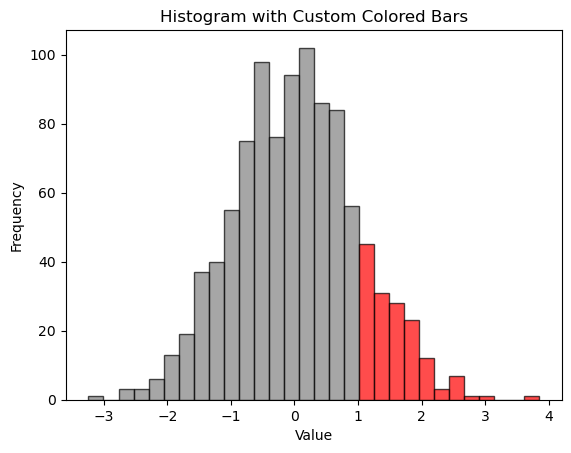

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
data = np.random.randn(1000)  # Example data

# Create the histogram
hist_values, bin_edges, patches = plt.hist(data, bins=30, color='gray', edgecolor='black', alpha=0.7)

# Specify the condition for coloring bars
threshold = 1.0  # Example: Color bars where the bin center is greater than 1.0
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculate bin centers

# Apply a different color to bars based on the condition
for center, patch in zip(bin_centers, patches):
    if center > threshold:  # Example condition
        patch.set_facecolor('red')  # Change color to red

# Add labels and title
plt.title('Histogram with Custom Colored Bars')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


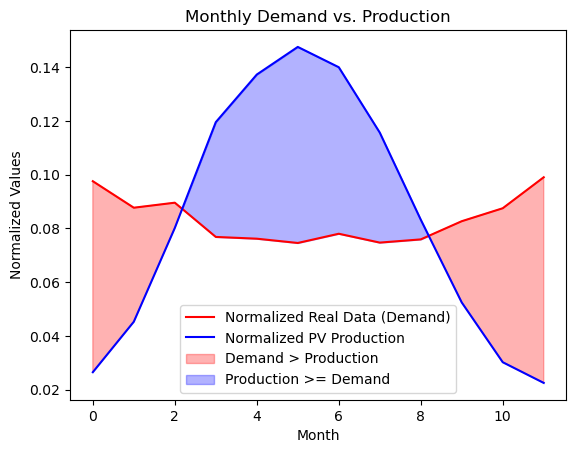

Maximum positive difference (Demand > Production): 0.0765
Maximum negative difference (Production > Demand): -0.0730


In [55]:
import matplotlib.pyplot as plt

# Input data
monthly_real_data = [261.185, 234.776, 239.783, 205.664, 203.909, 199.640, 208.839, 200.014, 203.208, 221.326, 234.241, 265.131]
total_energy = tools.total_energy_per_month(pvpot)  # Assuming this is a list of monthly values

# Normalize monthly_real_data
total_real_data = sum(monthly_real_data)
normalized_real_data = [x / total_real_data for x in monthly_real_data]

# Normalize total_energy
total_energy_sum = sum(total_energy)
normalized_total_energy = [x / total_energy_sum for x in total_energy]

# Calculate differences
differences = [r - e for r, e in zip(normalized_real_data, normalized_total_energy)]

# Maximum positive and negative differences
max_positive_diff = max(differences)  # When demand > production
max_negative_diff = min(differences)  # When production > demand

# Plot normalized data
plt.plot(normalized_real_data, label='Normalized Real Data (Demand)', color='red')
plt.plot(normalized_total_energy, label='Normalized PV Production', color='blue')

# Fill areas: Red where demand > production, Blue where production > demand
plt.fill_between(
    range(len(normalized_real_data)),
    normalized_real_data,
    normalized_total_energy,
    where=[r > e for r, e in zip(normalized_real_data, normalized_total_energy)],
    interpolate=True,
    color='red',
    alpha=0.3,
    label='Demand > Production'
)

plt.fill_between(
    range(len(normalized_real_data)),
    normalized_real_data,
    normalized_total_energy,
    where=[r <= e for r, e in zip(normalized_real_data, normalized_total_energy)],
    interpolate=True,
    color='blue',
    alpha=0.3,
    label='Production >= Demand'
)

# Add labels, legend, and show plot
plt.xlabel('Month')
plt.ylabel('Normalized Values')
plt.legend()
plt.title('Monthly Demand vs. Production')
plt.show()

# Print maximum positive and negative differences
print(f"Maximum positive difference (Demand > Production): {max_positive_diff:.4f}")
print(f"Maximum negative difference (Production > Demand): {max_negative_diff:.4f}")